### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-09/02/20
#### Clasificacion de imagenes motoras en EEG con CNN-2D
##### Caracteristicas = RAW
##### 5 ejecuciones independientes

##### Sujeto 1
##### Accuracy = 38.54%
##### Kappa = 0.1806

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA01E.csv", header=None)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [ ]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [ ]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [ ]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 1000, 1))
x_test = x_test.reshape((n_samples_test, 22, 1000, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1000, 1)
(288, 22, 1000, 1)


In [ ]:
def CNN_2D():
  model = Sequential()
  model.add(Conv2D(16, (3,3), activation='relu', input_shape=x_train.shape[1:]))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(16, (3,3), activation='relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))
    
  optimizer = Adam(lr=1e-6)
  model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return model

Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
288/288 - 0s - loss: 1.2883 - acc: 0.3854
kappa:  0.18055555555555558
f1: 0.38463600735742415
confusion matrix:
 [[31 16  9 16]
 [30 24  8 10]
 [17 12 25 18]
 [12  7 22 31]]


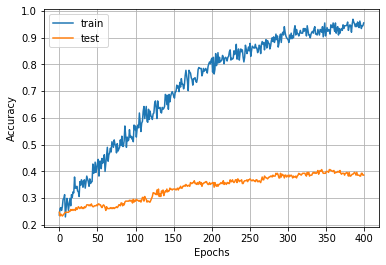

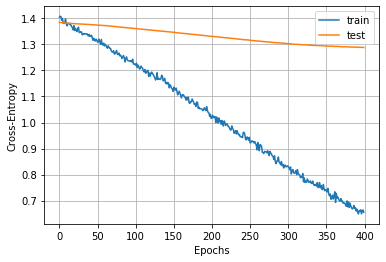

Iteration: 2
288/288 - 0s - loss: 1.3897 - acc: 0.3229
kappa:  0.09722222222222221
f1: 0.32101198227149463
confusion matrix:
 [[28 17 16 11]
 [37 16 11  8]
 [15 10 23 24]
 [16 15 15 26]]


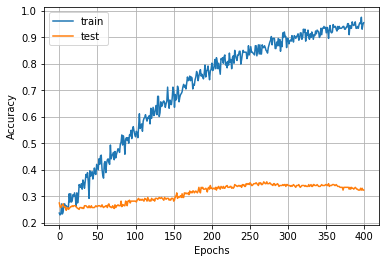

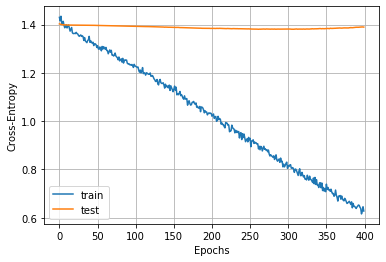

Iteration: 3
288/288 - 0s - loss: 1.3782 - acc: 0.3299
kappa:  0.10648148148148151
f1: 0.32715426789667174
confusion matrix:
 [[29 20 11 12]
 [29 19  9 15]
 [18  7 20 27]
 [14 12 19 27]]


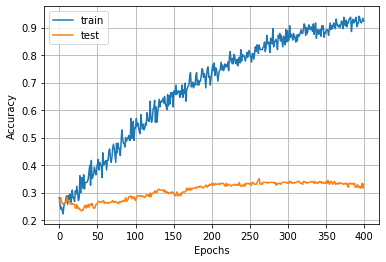

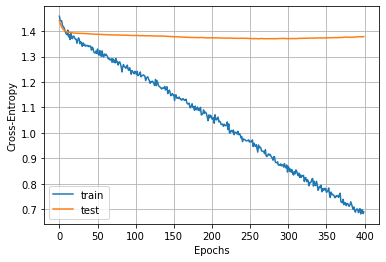

Iteration: 4
288/288 - 0s - loss: 1.3267 - acc: 0.3750
kappa:  0.16666666666666663
f1: 0.3753925580510088
confusion matrix:
 [[25 21 17  9]
 [31 25  9  7]
 [11 11 27 23]
 [ 9 13 19 31]]


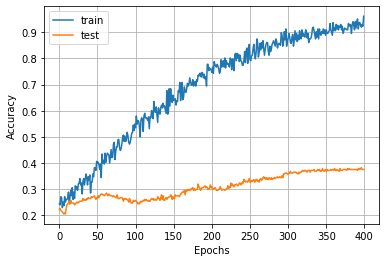

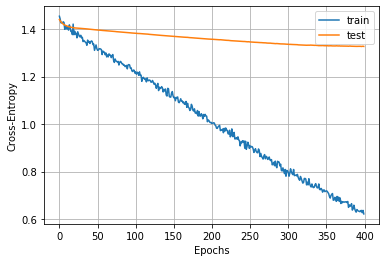

Iteration: 5
288/288 - 0s - loss: 1.3476 - acc: 0.3264
kappa:  0.10185185185185186
f1: 0.3283079239600979
confusion matrix:
 [[22 25 16  9]
 [28 20 17  7]
 [19 11 26 16]
 [13 10 23 26]]


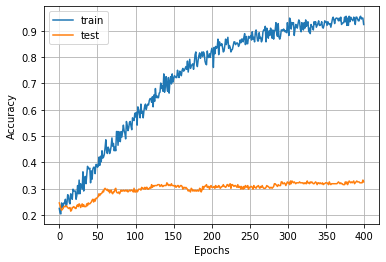

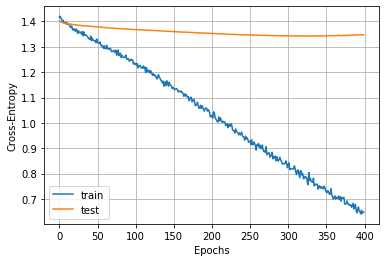


Resultados:
loss: [1.288295030593872, 1.3897433016035292, 1.3782266510857477, 1.3267086744308472, 1.347564008500841]
accuracy: [0.38541666, 0.32291666, 0.3298611, 0.375, 0.3263889]
kappa: [0.18055555555555558, 0.09722222222222221, 0.10648148148148151, 0.16666666666666663, 0.10185185185185186]
f1: [0.38463600735742415, 0.32101198227149463, 0.32715426789667174, 0.3753925580510088, 0.3283079239600979]


In [ ]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = CNN_2D()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 20, 998, 16)       160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 499, 16)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 497, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 248, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 15872)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1015872   
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [ ]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.3479
Mean Kappa: 0.1306
Mean F1: 0.3473
Max Accuracy: 0.3854
Max Kappa: 0.1806
Max F1: 0.3846
